<a href="https://colab.research.google.com/github/faezesarlakifar/ImageProcessing-ComputerVision/blob/main/HistEQ_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessaries

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# used for applying histogram equalization with pillow
from PIL import ImageOps

# Show Image and its Histogram before Histogram Equalization

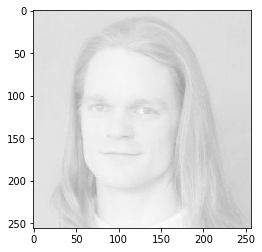

In [ ]:
input_im = Image.open('test.jpg') 

plt.imshow(input_im, cmap='gray', vmin=0, vmax=255)

## Get Number of Pixels for each Gray level

In [ ]:
def Get_NumOfPixels(width, height, arr, n):
    NumOfPixels = np.zeros(n+1).astype(int)

    for i in range(0, width):
        for j in range(0, height):
            gray_level = arr[i, j]
            NumOfPixels[gray_level] += 1

    return NumOfPixels

In [ ]:
n = 255

width_, height_ = input_im.size
arr_ = np.array(input_im)


NumOfPixels_ = Get_NumOfPixels(width_, height_, arr_, n)



### Test this method:

In [ ]:
array_ = np.array([[2, 3, 3, 2], [4, 2, 4, 3], [3, 2, 3, 5], [2, 4, 2, 4]])
NumOfPixels_test = Get_NumOfPixels(4, 4, array_, 9)


NumOfPixels_test

array([0, 0, 6, 5, 4, 1, 0, 0, 0, 0])

great! it works and the result is correct!

## Plot Histogram

In [ ]:
def Plot_Histogram(X, Y, title, color_):
    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(X, Y, color=str(color_), width = 0.4)
 
    plt.xlabel("Gray Levels")
    plt.ylabel("No. of Pixels for each Gray Level")
    plt.title(title)
    plt.show() 


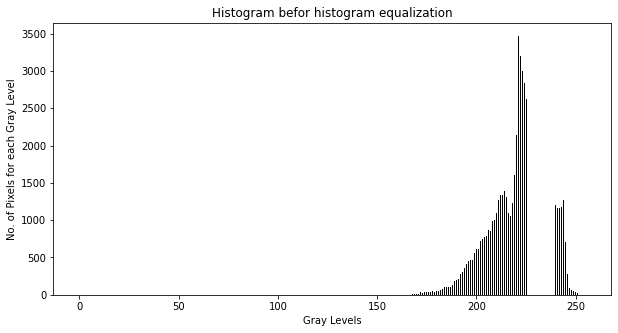

In [ ]:
X_ = range(0, 256)
Y_ = NumOfPixels_
title_ = "Histogram befor histogram equalization"

Plot_Histogram(X_, Y_, title_, 'black')

# Try Histogram Equalization Algoritm

### implement this formula and try it for our image

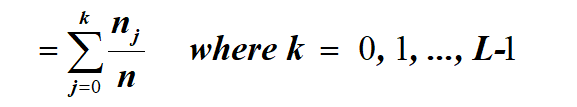

#### Histogram Equalization Formula

In [ ]:
def Hist_Eq_formula(width, height, n_, arr):
    s = []
    size__ = width * height

    for i in range(0, n_+1):
        indices = arr[0: i+1] 
        sum_ = np.sum(arr[0:i+1])
        div_ = sum_ / size__
        current = round(div_ * n_)
        s.append(current)

    return s

##### Test this method

In [ ]:
s_test = Hist_Eq_formula(4, 4, 9, NumOfPixels_test) 

s_test 

[0, 0, 3, 6, 8, 9, 9, 9, 9, 9]

Great! the result is correct!

#### Method for Apply Histogram Equalization on Image 

In [ ]:
def Apply_Hist_Eq(width, height, n_, s_, arr):

    closed = np.zeros(arr.shape).astype(int)

    for i in range(0, n_+1):
      for j in range(0, width):
        for k in range(0, height):
            if((arr[j, k] == i) and (closed[j, k] == 0)):
                arr[j, k] = s_[i]
                closed[j, k] = 1

    return arr 

##### Test this method

In [ ]:
print('input array:\n', array_)
result_array_test = Apply_Hist_Eq(4, 4, 9, s_test, array_)

print('result array:\n', result_array_test) 

input array:
 [[2 3 3 2]
 [4 2 4 3]
 [3 2 3 5]
 [2 4 2 4]]
result array:
 [[3 6 6 3]
 [8 3 8 6]
 [6 3 6 9]
 [3 8 3 8]]


Great! the result is correct

#### Use Above Methods for Our Input Image

In [ ]:
s_im = Hist_Eq_formula(width_, height_, n, NumOfPixels_)

result_array = Apply_Hist_Eq(width_, height_, n, s_im, arr_)  

# Show Result Image

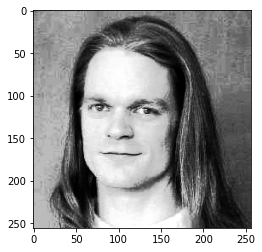

In [ ]:
my_result_im = Image.fromarray(arr_, 'L')
my_result_im.save('result_01.png')

plt.imshow(my_result_im, cmap='gray')
my_result_im.show()

## Histogram After Applying Histogram Equalization

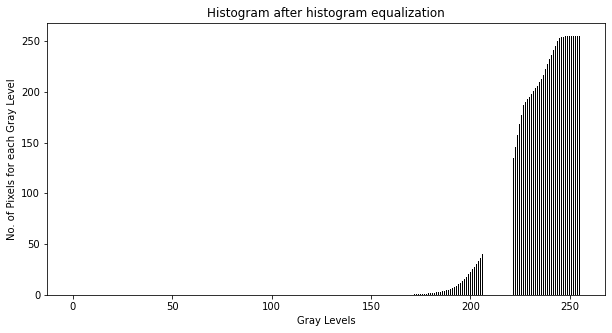

In [ ]:
X = range(0, 256) 
title = "Histogram after histogram equalization"
Plot_Histogram(X, s_im, title, 'black')

# Use Pillow for Applying Histogram Equalization

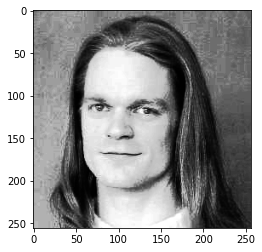

In [ ]:
# applying equalize method 
pillow_result_im = ImageOps.equalize(input_im, mask = None)
pillow_result_im.save('result_02.png')

plt.imshow(pillow_result_im, cmap='gray')
pillow_result_im.show()


# Compare The Results

## Compare Histograms before and after Histogram Equalization 

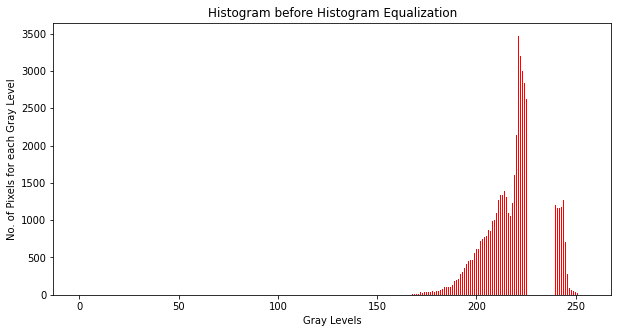

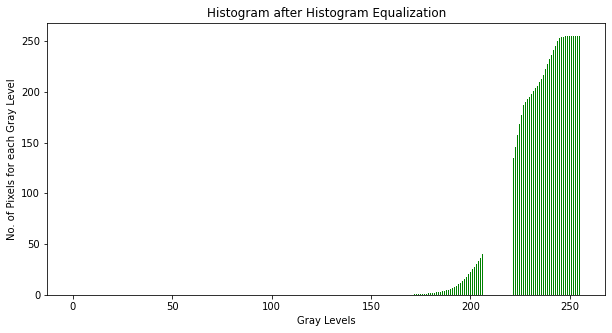

In [ ]:
X = range(0, 256) 
title = "Histogram before Histogram Equalization"
Plot_Histogram(X, NumOfPixels_, title, 'red') 

print()

title = "Histogram after Histogram Equalization"
Plot_Histogram(X, s_im, title, 'green') 

## Compare our Result Image with Pillow Result

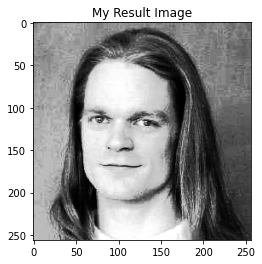

In [ ]:
plt.title('My Result Image')
plt.imshow(my_result_im, cmap='gray')
my_result_im.show() 


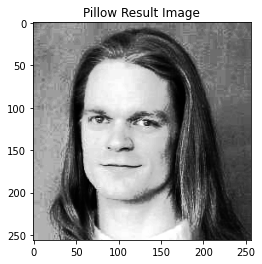

In [ ]:
plt.title('Pillow Result Image')
plt.imshow(pillow_result_im, cmap='gray')
pillow_result_im.show() 